[Link to source code](https://github.com/AidMMcMillan/AidMMcMillan.github.io/tree/main/posts/blog1/perceptron.py)

# Implimenting the Perceptron Algorithm

In order to implement the perceptron algorithm in python, I created a perceptron class. Within that class I defined the fit method:
```python
fit(self, X, y, max_steps)
```

Before iterating through the algorithm, I first made an array $\tilde{\mathbf{X}} = [\mathbf{X}, \mathbf{1}]$ and initialed the vector $\tilde{\mathbf{w}}$ with random values from $0-1$:

```python
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)

self.w = np.random.rand(X_.shape[1])
```

After initializing $\tilde{\mathbf{X}}$ and $\tilde{\mathbf{w}}$, I iterated between random vectors in $\tilde{\mathbf{X}}$ and updated $\tilde{\mathbf{w}}$ using the perceptron algorithim defined as:

$$\tilde{\mathbf{w}}^{(t+1)} = \tilde{\mathbf{w}}^{(t)} + \mathbb{1}(\tilde{y}_i \langle \tilde{\mathbf{w}}^{(t)}, \tilde{\mathbf{x}}_i\rangle < 0)\tilde{y}_i \tilde{\mathbf{x}}_i$$

In python that algorithm looks like:
```python
self.w = self.w + (1*((y_*(self.w@X_[i]))<0))*(y_*X_[i])
```

# Experiment 1: Linearly Seperable Data

Using the ```make_blobs()``` fuction, I created two linearly seperable groups of data. I then created an instance of the perceptron class and called the fit method on the data. Plotting both the data and the hyperplane (line) that seperated the data makes it clear that this test resultued in a success:

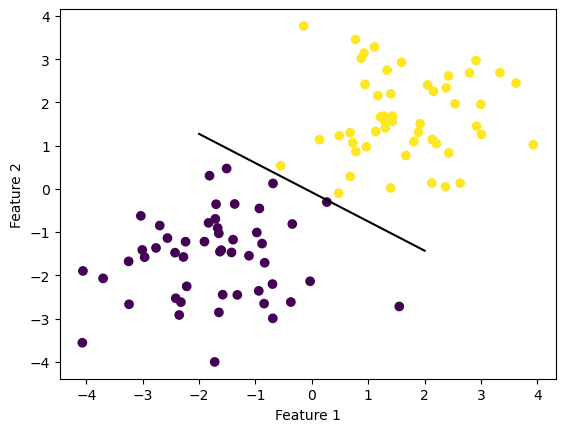

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from perceptron import Perceptron

from sklearn.datasets import make_blobs, make_circles

np.random.seed(12345)

X, y = make_blobs(n_samples = 100, n_features = 2, centers = [(-1.7, -1.7), (1.7, 1.7)])

p = Perceptron()
p.fit(X, y, max_steps = 1000)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Looking at the last few accuracy scores we can also see that the perceptron algorithm converged and reached 100% accuracy.

In [5]:
print(p.history[-10:])

[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]


This graph shows the full progression of the acuracy throughout all iterations of the algorithm. We can clealy see that the algorithm converged and it finished before reaching ```max_steps=1000```.

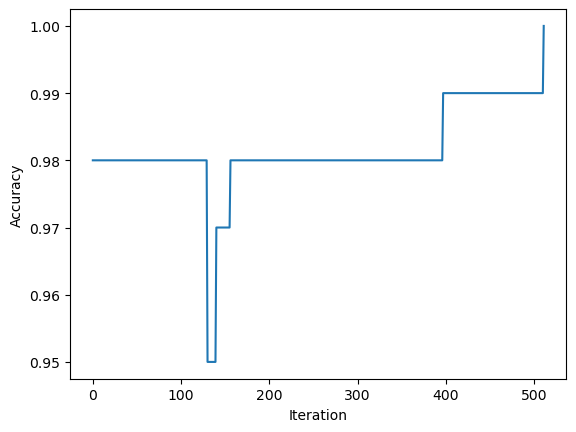

In [6]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

# Experiment 2 & 3: Perceptron Algorithm on Non-linearly Seperable Data

In **experiment two**, I used the ```make_blobs()``` function but put the centers of the blobs closer together so that they would have overlapping data. As seen in the figure below, the two sets of data are not linearly seperable. We can see that the line seperates the data to some extent but does not completely seperate the data because that would be impossible. This is the line achieved after 1000 iterations of the algorithm.

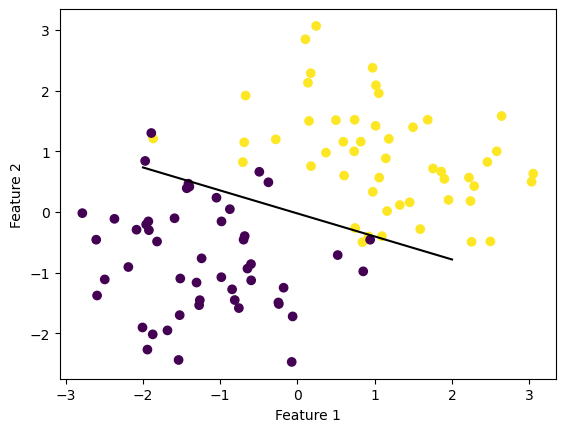

In [18]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = [(-1, -1), (1, 1)])

p = Perceptron()
p.fit(X, y, max_steps = 1000)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Below we also see that perfect accuracy is not acheived after 1000 iterations. Furthermore, the accuracy also does not consistantly improve with each iteration. It even drops from 97% to 94% in the last two iterations.

In [19]:
print(p.history[-10:])

[0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.94, 0.94]


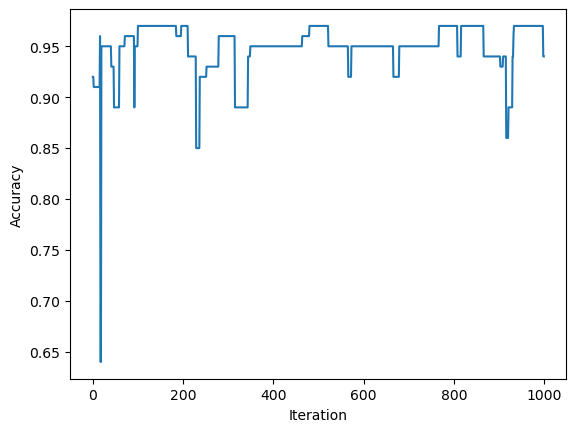

In [20]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

In **experiment three** I created another non linear data set using the ```make_circles()``` function. This results in a two sets of data in the shape of a circle, one encompassing the other. From this experiment we also see that it is impossible to seperate the two sets of data with a hyperplane. 

I chose to include this experiment as well in order to highlight the downsides to using perceptrons to seperate data. 

While there are cases in which non-linearly seperable data sets are still roughly seperable by a hyperplane (such as experiment 2) there are cases like the one below where a hyperplane would not even be helpful in predicting the labels of the data.

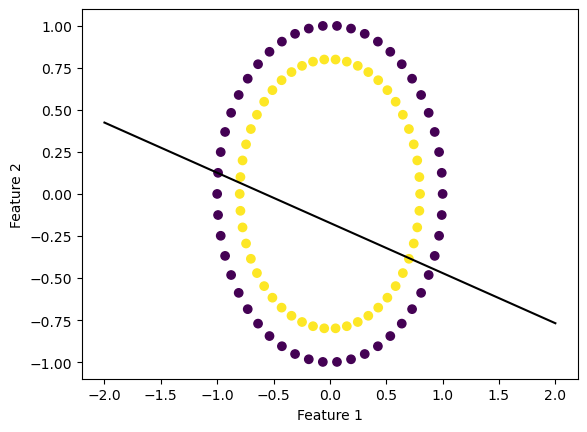

In [24]:
X, y = make_circles(random_state = 12345)

p = Perceptron()
p.fit(X, y, max_steps = 1000)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Below we see that the acuracy hovers around 50% and does not improve with each iteration. Because we used binary classifiers, a 50% accuracy rate means that this peceptron is just as good as guessing and is therefore not even helpful in classifying the data sets.

In [25]:
print(p.history[-10:])

[0.52, 0.52, 0.52, 0.52, 0.52, 0.5, 0.5, 0.5, 0.5, 0.5]


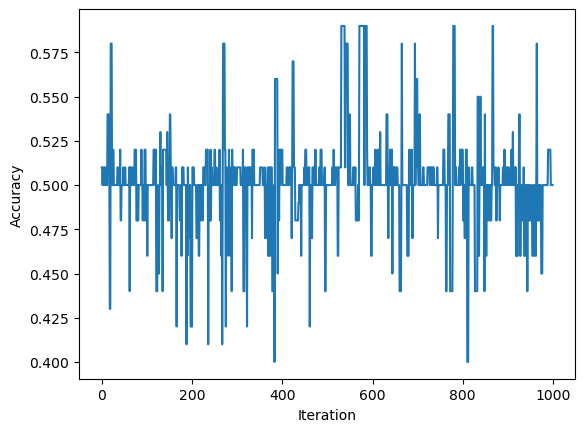

In [26]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

# Eperiment 4: Perceptron Algorithm on 5-dimensional Data

In my final experiment, I ran the perceptron algorithm on data with 5 features instead of two. Unfortionally, such data is hard to represent visually so because of the dimensionality. I created the set using ```make_blobs()``` with 5 features instead of 2 and centers at ```(-1, -1, -1, -1, -1) ``` and ```(1.7, 1.7, 1.7, 1.7, 1.7)```.

In [55]:
np.random.seed(123)

X, y = make_blobs(n_samples = 100, n_features = 5, 
                  centers = [(-1, -1, -1, -1, -1), 
                             (1.7, 1.7, 1.7, 1.7, 1.7)])

p = Perceptron()
p.fit(X, y, max_steps = 1000)

Below we see the weights and biases of $\tilde{\mathbf{w}}$.

In [56]:
print(p.w)

[ 3.26420494  0.99757888  1.62033846  1.70676209  0.21630719 -3.72850816]


As shown below, this experiment proved sucessful since the algorithm converged finding a hyperplane that seperated the data with perfect accuracy. This also means our data generated using the ```make_blobs()``` function was linearly seperable.

In [57]:
print(p.history[-10:])

[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]


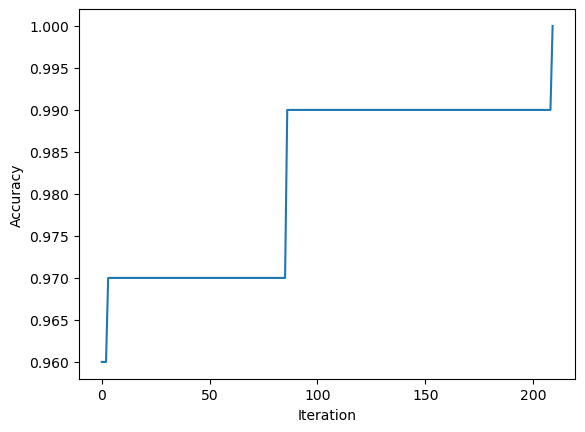

In [58]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

# Runtime Complexity of Single Iteration of the Perceptron Algorithm



In [226]:
import importlib
importlib.reload(perceptron)

<module 'perceptron' from '/Users/edwardmckeon/Documents/Blog1/perceptron.py'>